In [1]:
# Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris



In [2]:

# Load and prepare dataset
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['target'] = iris.target

# 🔁 Map target numbers to species names
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})


In [3]:
# Basic info
print("Dataset Info:")
print(df.info())
print("\nBasic Statistics:")
print(df.describe())

# Null values check
print("\nNull Values:\n", df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
 5   species            150 non-null    object 
dtypes: float64(4), int32(1), object(1)
memory usage: 6.6+ KB
None

Basic Statistics:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066          0.435866           1.765298   
min             4.300000          2.000000           1.000000   
25%             5.100000          2.800000           1.600000   
50%             5.8000

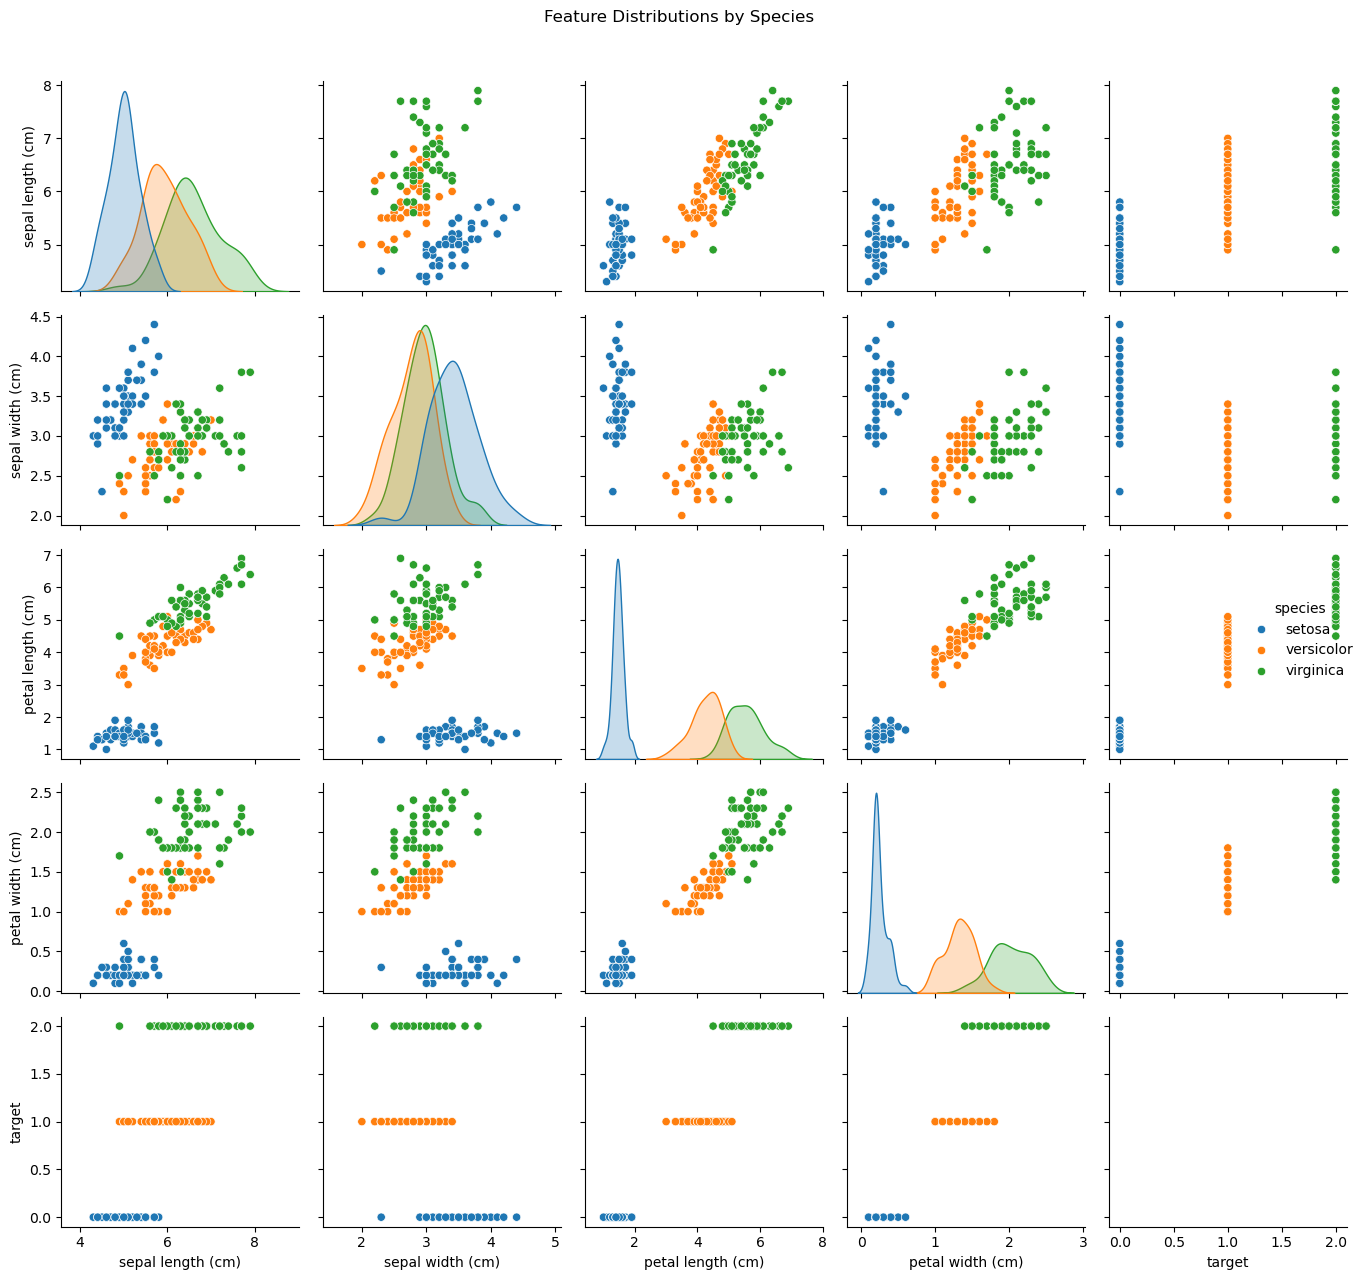

In [4]:
# 📌 Pairplot (shows distribution and class separability)
sns.pairplot(df, hue='species')
plt.suptitle("Feature Distributions by Species", y=1.02)
plt.tight_layout()
plt.show()



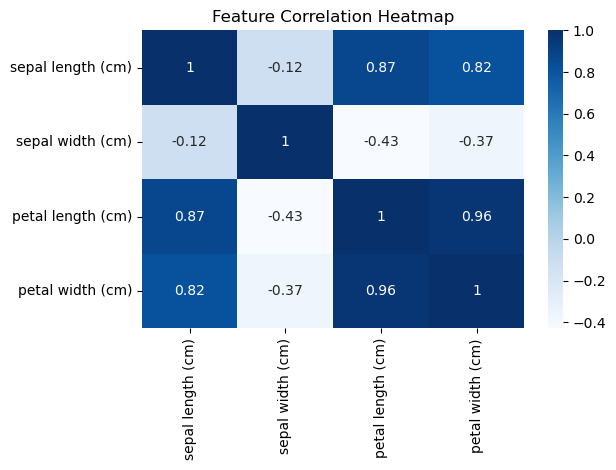

In [9]:
# 📌 Correlation Heatmap
sns.heatmap(df.drop(columns=['target',"species"]).corr(), annot=True, cmap='Blues')
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()


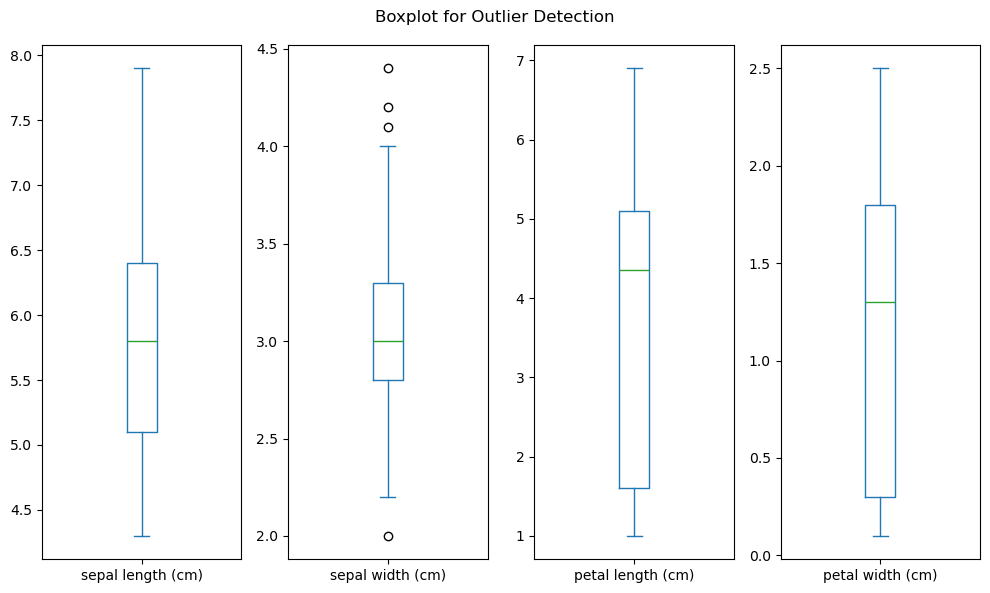

In [25]:
# Boxplot to detect outliers
df.drop("target",axis=1).plot(kind='box', subplots=True, figsize=(10,6))
plt.suptitle("Boxplot for Outlier Detection")
plt.tight_layout()
plt.show()


sepal length (cm): Removed 0 outliers
sepal width (cm): Removed 4 outliers
petal length (cm): Removed 0 outliers
petal width (cm): Removed 0 outliers


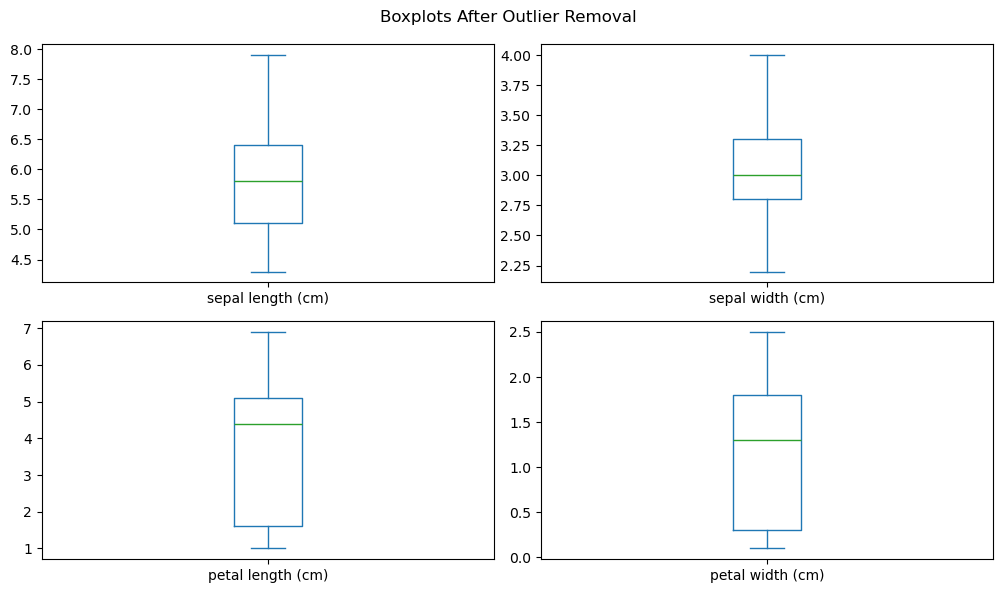

In [19]:
# IQR method for outlier removal
def remove_outliers_iqr(df, columns):
    clean_df = df.copy()
    for col in columns:
        Q1 = clean_df[col].quantile(0.25)
        Q3 = clean_df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        before = clean_df.shape[0]
        clean_df = clean_df[(clean_df[col] >= lower) & (clean_df[col] <= upper)]
        after = clean_df.shape[0]
        print(f"{col}: Removed {before - after} outliers")
    return clean_df

# Check and remove outliers from numeric columns
numeric_cols = iris.feature_names
df_cleaned = remove_outliers_iqr(df, numeric_cols)

# Boxplot after cleaning
df_cleaned[numeric_cols].plot(kind='box', subplots=True, layout=(2, 2), figsize=(10, 6), title="Boxplots After Outlier Removal")
plt.tight_layout()
plt.show()


In [29]:
!pip install ydata-profiling

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/666.4 kB ? eta -:--:--
   ---------------------------------------- 666.4/666.4 kB 3.7 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27091 sha256=c116f7281cf05841b131ea7abd7383e160c7901f1157a7b201ef8c82bcf52265
  Stored in directory: c:\users\lenovo\appdata\local\pip\cache\wheels\5f\d4\d7\4189b07b5902ee9f3ce0dbb14909fbe8037c39d6c63ffd49c9
Successfully built htmlmin


In [35]:
from ydata_profiling import ProfileReport

# 📊 Create the profiling report
profile = ProfileReport(df, title="Iris Dataset Profiling Report", explorative=True)

# Export to HTML (easiest to view and print to PDF)
profile.to_file("iris_eda_report.html")

# Optional: Export to PDF (requires LaTeX installed)
# profile.to_file("iris_eda_report.pdf")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 165.21it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]